In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **DATA GATHERING AND CLEANING**

In [2]:
import pandas as pd
import numpy as np
import csv

csv_path = 'gdrive/MyDrive/pantun.csv'
df = pd.read_csv(csv_path)

In [3]:
df.tail()

,teks,tipe
485,orang palembang menanam padi \n negeri malaka ...,Pantun Nasihat
486,burung kakatua \n hinggap dijendela \n siapa y...,Pantun Nasihat
487,Burung kakak tua udah tak berdaya \n Burung ad...,Pantun Nasihat
488,kucing kurus mandi dipapan \n papan nya sikayu...,Pantun Nasihat
489,disana gunung disini gunung \n ditengah tengah...,Pantun Nasihat


In [4]:
df = df.drop(columns='tipe')
df.head()

,teks
0,Pakai baju ukurannya pas \n Baju biru pemberia...
1,Orang bijak cinta bahasa \n Bahasa luas Bahasa...
2,Kepada siapa datangnya wahyu \n Kepada Nabi wa...
3,Citah perang melawan citah \n Seekor pelatuk m...
4,"Ada gadis perawan, \n paling cantik di kampung..."


In [5]:
def seperate_lines(df):
  df[['Satu','Dua','Tiga','Empat','Lima','enam','tujuh','lapan','lan','luh']] = df.teks.str.split("\\",expand=True,)
  new_df = df.drop(['teks','Lima','enam','tujuh','lapan','lan','luh'], axis=1)
  return new_df

def remove_row_with_null(df):
  null_satu = df.index[df['Satu'].isnull()].tolist()
  null_dua = df.index[df['Dua'].isnull()].tolist()
  null_tiga = df.index[df['Tiga'].isnull()].tolist()
  null_empat = df.index[df['Empat'].isnull()].tolist()

  df.drop(null_satu, inplace=True)
  df.drop(null_dua, inplace=True)
  df.drop(null_tiga, inplace=True)
  df.drop(null_empat, inplace=True)
  return df

def remove_enter(df):
  for index, row in df.iterrows():
    row['Dua'] = row['Dua'][2:]
    row['Tiga'] = row['Tiga'][2:]
    row['Empat'] = row['Empat'][2:]
  return df

In [6]:
# Seperate every line into different columns

new_df = seperate_lines(df)
new_df = remove_row_with_null(new_df)
new_df = remove_enter(new_df)

In [7]:
new_df.tail()

,Satu,Dua,Tiga,Empat
485,orang palembang menanam padi,negeri malaka negeri seberang,putus cinta jangan bersedih,dunia ini masih panjang
486,burung kakatua,hinggap dijendela,siapa yang jatuh cinta,pasti cemburu buta
487,Burung kakak tua udah tak berdaya,Burung adik muda terbang ke angkasa,Makasi kakek telah berjuang bela negara,Sekarang adek bahagia di hari MERDEKA
488,kucing kurus mandi dipapan,papan nya sikayu jati,aku kurus bukan karena kurang makan,tetapi mikirin sijantung hati
489,disana gunung disini gunung,ditengah tengah gunung berapi,kesana bingung kesini bingung,itulah namanya jatuh hati


In [8]:
# Make a series of every word used in pantun

kata = []
for row in new_df['Satu']:
  ls = row.split(" ")
  for i in ls:
    kata.append(i)
for row in new_df['Dua']:
  ls = row.split(" ")
  for i in ls:
    kata.append(i)
for row in new_df['Tiga']:
  ls = row.split(" ")
  for i in ls:
    kata.append(i)
for row in new_df['Empat']:
  ls = row.split(" ")
  for i in ls:
    kata.append(i)

kata_series = pd.Series(kata)

kata_series = kata_series.str.replace(r'[^\w\s]+', '', -1)
kata_series = kata_series.str.replace(' ', '', -1)
kata_series = kata_series.str.lower()
kata_series = kata_series.drop_duplicates()
kata_series.replace('', np.nan, inplace=True)
kata_series.dropna(inplace=True)
kata_series = kata_series.reset_index(drop=True)

kata_series.describe()

count              2902
unique             2902
top       berbarisbaris
freq                  1
dtype: object

In [9]:
# Make series for every akhiran in words

labels = []
vowel = ['a', 'i', 'u', 'e', 'o']
counter = 0

for kata in kata_series:
  
  temp = []
  if not set('aeiou').intersection(kata):
    labels.append("AAAAAA")
  else:
    for i in reversed(kata):
      
      temp.append(i)
      if i in vowel:
        counter += 1
        labels.append(''.join(temp)[::-1])
        break

print("Length of the series: {}".format(len(labels)))
print("Words with akhiran: {}\n".format(counter))

label_series = pd.Series(labels)
label_series.describe()

Length of the series: 2902
Words with akhiran: 2889



count     2902
unique      74
top          a
freq       575
dtype: object

In [10]:
# Test the series

print("the word: {}".format(kata_series[2706]))
print("akhiran: {}".format(labels[2706]))

the word: ajaran
akhiran: an


In [43]:
# Make the DF

frame = {'kata': kata_series,
         'akhiran': label_series}
  
df_rhyme = pd.DataFrame(frame)
df_rhyme.describe()

,kata,akhiran
count,2902,2902
unique,2902,74
top,berbarisbaris,a
freq,1,575


In [44]:
# find words with null akhiran

df_rhyme[df_rhyme['akhiran'] == "AAAAAA"]

,kata,akhiran
289,d,AAAAAA
628,2,AAAAAA
980,yg,AAAAAA
1148,lh,AAAAAA
1264,k,AAAAAA
1623,11,AAAAAA
1930,mw,AAAAAA
1982,mcm,AAAAAA
1986,nk,AAAAAA
2118,72,AAAAAA


<img src="https://i.kym-cdn.com/entries/icons/facebook/000/034/772/Untitled-1.jpg" width="400">

In [45]:
df_rhyme.replace('AAAAAA', np.nan, inplace=True)
df_rhyme.dropna(inplace=True)

df_rhyme['akhiran'].isnull().value_counts()

False    2889
Name: akhiran, dtype: int64

In [46]:
df_rhyme.akhiran.unique()

array(['i', 'u', 'a', 'as', 'ang', 'ak', 'ah', 'an', 'is', 'in', 'ap',
       'at', 'am', 'it', 'up', 'or', 'uh', 'ab', 'e', 'ul', 'ung', 'ik',
       'ir', 'ut', 'il', 'un', 'ar', 'us', 'on', 'im', 'em', 'um', 'ih',
       'ok', 'ing', 'er', 'ur', 'o', 'ity', 'uk', 'eng', 'al', 'ip', 'et',
       'od', 'es', 'ib', 'ek', 'ong', 'ipt', 'ath', 'if', 'ep', 'el',
       'eh', 'ud', 'alm', 'oh', 'ol', 'en', 'af', 'ey', 'uz', 'os', 'id',
       'unk', 'elm', 'aq', 'ess', 'iz', 'ow', 'alh', 'op'], dtype=object)

In [47]:
# Handle akhiran yang aneh : alm, ity, uz, elm, aq, ess, iz, ow, alh, ath, od, ipt, id, unk

df_rhyme['akhiran'].replace('alm', 'em', inplace=True)
df_rhyme['akhiran'].replace('ity', 'i', inplace=True)
df_rhyme['akhiran'].replace('uz', 'us', inplace=True)
df_rhyme['akhiran'].replace('elm', 'em', inplace=True)
df_rhyme['akhiran'].replace('aq', 'u', inplace=True)
df_rhyme['akhiran'].replace('ess', 'es', inplace=True)
df_rhyme['akhiran'].replace('iz', 'is', inplace=True)
df_rhyme['akhiran'].replace('id', 'it', inplace=True)
df_rhyme['akhiran'].replace('ath', 'at', inplace=True)
df_rhyme['akhiran'].replace('od', 'ut', inplace=True)

# akhiran ipt
df_rhyme.drop(671, inplace=True)
# akhiran alh
df_rhyme.drop(2709, inplace=True)
# akhiran unk
df_rhyme.drop(2366, inplace=True)

df_rhyme.akhiran.unique()

array(['i', 'u', 'a', 'as', 'ang', 'ak', 'ah', 'an', 'is', 'in', 'ap',
       'at', 'am', 'it', 'up', 'or', 'uh', 'ab', 'e', 'ul', 'ung', 'ik',
       'ir', 'ut', 'il', 'un', 'ar', 'us', 'on', 'im', 'em', 'um', 'ih',
       'ok', 'ing', 'er', 'ur', 'o', 'uk', 'eng', 'al', 'ip', 'et', 'es',
       'ib', 'ek', 'ong', 'if', 'ep', 'el', 'eh', 'ud', 'oh', 'ol', 'en',
       'af', 'ey', 'os', 'ow', 'op'], dtype=object)

In [52]:
df_rhyme.akhiran.value_counts()

a      575
an     329
i      300
u      207
ah     195
ang    173
at     115
ar      85
ak      84
is      47
un      44
as      40
in      37
ut      37
uh      34
e       34
ung     33
ing     33
am      33
ik      31
ur      30
uk      29
al      29
ap      26
ih      22
it      21
us      21
ok      20
ir      19
o       18
um      17
il      13
ek      12
er      12
or      10
up      10
em      10
ul      10
on       9
ong      9
et       8
eng      7
eh       6
es       5
ib       5
oh       5
im       5
el       4
ep       4
ab       4
if       4
ip       3
en       2
os       2
ud       2
ow       2
ol       2
ey       1
af       1
op       1
Name: akhiran, dtype: int64

In [49]:
df_rhyme[df_rhyme['akhiran'] == 'unk']

,kata,akhiran


In [50]:
# Ada akhiran yang cuma 1

df2 = pd.DataFrame([['mei', 'ey'],
                    ['may', 'ey'],
                    ['hei', 'ey'],
                    ['wakaf', 'af'],
                    ['draf', 'af'],
                    ['khilaf', 'af'],
                    ['sop', 'op'],
                    ['stetoskop', 'op'],
                    ['bioskop', 'op'],
                    ['ancol', 'ol'],
                    ['bentol', 'ol'],
                    ['benjol', 'ol'],
                    ['cebol', 'ol']], columns=['kata', 'akhiran'])

added_df = df_rhyme.append(df2, ignore_index=True)

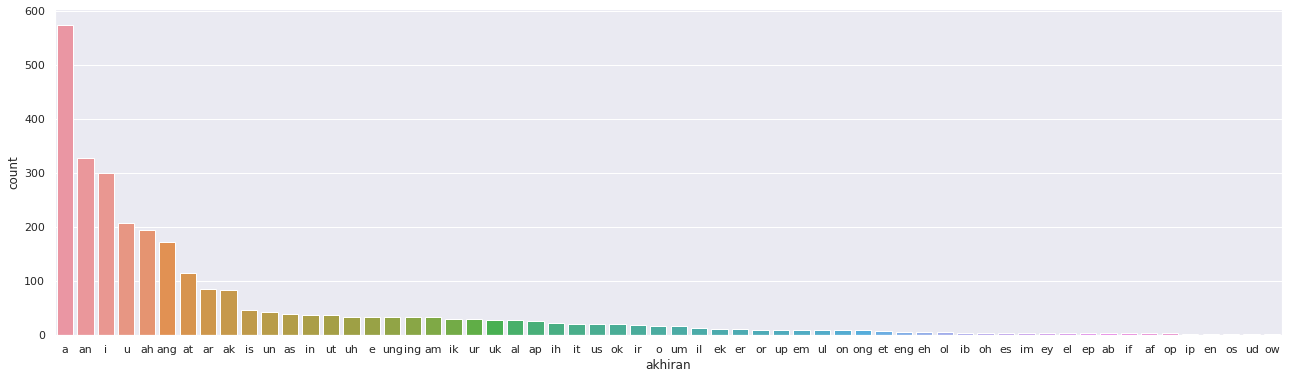

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.figure(figsize=(22, 6))
ax = sns.countplot(x="akhiran", data=added_df, order = added_df['akhiran'].value_counts().index)

In [53]:
added_df.akhiran.value_counts()

a      575
an     329
i      300
u      207
ah     195
ang    173
at     115
ar      85
ak      84
is      47
un      44
as      40
in      37
ut      37
uh      34
e       34
ung     33
ing     33
am      33
ik      31
ur      30
uk      29
al      29
ap      26
ih      22
it      21
us      21
ok      20
ir      19
o       18
um      17
il      13
ek      12
er      12
or      10
up      10
em      10
ul      10
on       9
ong      9
et       8
eng      7
eh       6
ol       6
ib       5
oh       5
es       5
im       5
ey       4
el       4
ep       4
ab       4
if       4
af       4
op       4
ip       3
en       2
os       2
ud       2
ow       2
Name: akhiran, dtype: int64

IMBALANCE LOL

In [55]:
added_df['akhiran'].describe()

count     2899
unique      60
top          a
freq       575
Name: akhiran, dtype: object



---



# **MODEL TRAINING**

In [56]:
# Split training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    added_df['kata'],
    added_df['akhiran'],
    test_size=0.1,
    random_state=45,
    stratify=added_df['akhiran'])

print("X_train: {}".format(X_train.count()))
print("X_test: {}\n".format(X_test.count()))
print("y_train: {}".format(y_train.count()))
print("y_test: {}".format(y_test.count()))

X_train: 2609
X_test: 290

y_train: 2609
y_test: 290


In [57]:
# Tokenize kata with char_level=True
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 26 # from a - z
embedding_dim = 16
max_length = 120

tokenizer = Tokenizer(num_words=vocab_size, char_level=True)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length)

# Tokenize validation
validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

290
(290, 120)


In [58]:
train_sequences[2]

[8, 3, 12, 1, 7, 1]

In [59]:
# Tokenize labels

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(added_df['akhiran'])

training_label_seq = np.array(label_tokenizer.texts_to_sequences(y_train))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(y_test))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[1]
[4]
[1]
(2609, 1)
[11]
[7]
[14]
(290, 1)


In [60]:
# Making the model, add dropout to reduce overfitting, and LSTM for RNN

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(61, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           432       
_________________________________________________________________
dropout (Dropout)            (None, 120, 16)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 64)           5184      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 29, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 61)                3965      
Total params: 42,605
Trainable params: 42,605
Non-trainable params: 0
____________________________________________________

In [61]:
# Training for 100 epochs

num_epochs = 100
history = model.fit(train_padded,
                    training_label_seq,
                    validation_data=(validation_padded, validation_label_seq),
                    verbose=2,
                    epochs=num_epochs)

Epoch 1/100
82/82 - 5s - loss: 3.3517 - accuracy: 0.1928 - val_loss: 3.0641 - val_accuracy: 0.2000
Epoch 2/100
82/82 - 2s - loss: 3.0620 - accuracy: 0.1982 - val_loss: 2.9535 - val_accuracy: 0.2000
Epoch 3/100
82/82 - 2s - loss: 2.7264 - accuracy: 0.3212 - val_loss: 2.3350 - val_accuracy: 0.4276
Epoch 4/100
82/82 - 2s - loss: 2.1050 - accuracy: 0.5178 - val_loss: 1.8072 - val_accuracy: 0.6000
Epoch 5/100
82/82 - 2s - loss: 1.7332 - accuracy: 0.5868 - val_loss: 1.5538 - val_accuracy: 0.6103
Epoch 6/100
82/82 - 2s - loss: 1.5140 - accuracy: 0.6244 - val_loss: 1.3597 - val_accuracy: 0.6552
Epoch 7/100
82/82 - 2s - loss: 1.3454 - accuracy: 0.6562 - val_loss: 1.2392 - val_accuracy: 0.6655
Epoch 8/100
82/82 - 2s - loss: 1.2220 - accuracy: 0.6738 - val_loss: 1.1330 - val_accuracy: 0.6897
Epoch 9/100
82/82 - 2s - loss: 1.1275 - accuracy: 0.6999 - val_loss: 1.0438 - val_accuracy: 0.7172
Epoch 10/100
82/82 - 2s - loss: 1.0343 - accuracy: 0.7267 - val_loss: 0.9758 - val_accuracy: 0.7379
Epoch 11/

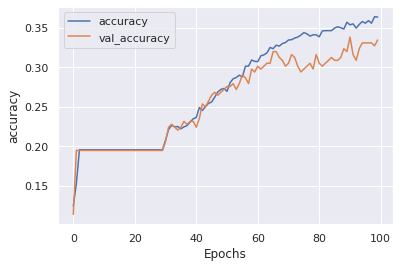

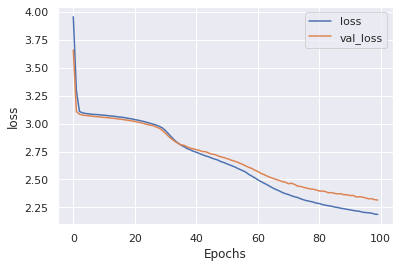

In [ ]:
# Plot before

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

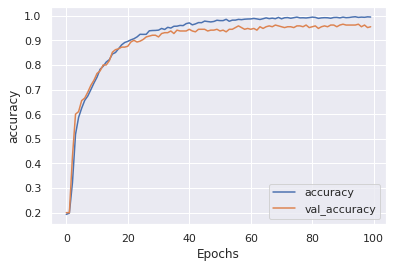

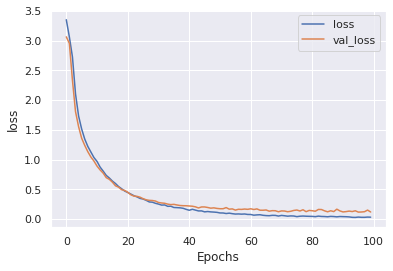

In [63]:
# plot after

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# Make the vecs and meta for embedding projector

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

e = model.layers[0]
weights = e.get_weights()[0]
# print(weights.shape) => shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
# Testing the result

def get_predicted_akhiran(text):
  last_word = text.split(' ')[-1]
  token_list = tokenizer.texts_to_sequences([last_word])[0]
  token_list = pad_sequences([token_list], padding='pre', maxlen=max_length)
  predicted = model.predict(token_list).argmax(axis =1)
  reverse_word_map = dict(map(reversed, label_tokenizer.word_index.items()))

  return reverse_word_map[predicted[0]]

print("PANTUN 1")
seed_text = "Jalan-jalan ke Sumbawa"
print(seed_text)
print(get_predicted_akhiran(seed_text))

seed_text = "Duduk-duduk makan buah palem"
print(seed_text)
print(get_predicted_akhiran(seed_text))

seed_text = "Geli hati menahan tawa"
print(seed_text)
print(get_predicted_akhiran(seed_text))

seed_text = "Melihat tupai memakai helm"
print(seed_text)
print(get_predicted_akhiran(seed_text))

print("\nPANTUN 2")
seed_text = "jalan jalan ke balikpapan"
print(seed_text)
print(get_predicted_akhiran(seed_text))

seed_text = "pulang pulang bawa sepeda mini"
print(seed_text)
print(get_predicted_akhiran(seed_text))

seed_text = "Adik kakak merinding penasaran"
print(seed_text)
print(get_predicted_akhiran(seed_text))

seed_text = "menengok kura kura pakai bikini"
print(seed_text)
print(get_predicted_akhiran(seed_text))

print("\nPANTUN 3")
seed_text = "Batang mawar memang kaku"
print(seed_text)
print(get_predicted_akhiran(seed_text))

seed_text = "Tapi bunganya tetap terawat"
print(seed_text)
print(get_predicted_akhiran(seed_text))

seed_text = "Jangan ragu akan hatiku"
print(seed_text)
print(get_predicted_akhiran(seed_text))

seed_text = "Karena cintaku tanpa syarat"
print(seed_text)
print(get_predicted_akhiran(seed_text))

PANTUN 1
Jalan-jalan ke Sumbawa
a
Duduk-duduk makan buah palem
em
Geli hati menahan tawa
a
Melihat tupai memakai helm
em

PANTUN 2
jalan jalan ke balikpapan
an
pulang pulang bawa sepeda mini
i
Adik kakak merinding penasaran
an
menengok kura kura pakai bikini
i

PANTUN 3
Batang mawar memang kaku
u
Tapi bunganya tetap terawat
at
Jangan ragu akan hatiku
u
Karena cintaku tanpa syarat
at


In [66]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 4.8MB/s 
     |████████████████████████████████| 112kB 10.8MB/s 
  Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [67]:
# SAVE VERSION 1

import tensorflowjs as tfjs

def save_model(model):
  model.save('rhyme_classification.h5')
  tfjs.converters.save_keras_model(model, 'gdrive/MyDrive/rhymetfjs')

save_model(model)

In [70]:
!zip -r rhyme.zip rhyme_classification.h5

  adding: rhyme_classification.h5 (deflated 12%)


In [71]:
from google.colab import files
files.download("rhyme.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>